In [82]:
!pip install bertopic

In [248]:
%%time
from bertopic import BERTopic
from umap import UMAP
import pandas as pd

# Read the file, change the name for different csv file
df = pd.read_csv('italian.csv')

CPU times: user 18.1 ms, sys: 1.49 ms, total: 19.6 ms
Wall time: 20.5 ms


In [249]:
df.head()

,business_id,name,category,stars,text
0,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,I took an 8 year old and a 14 year old for the...
1,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,The delivery would bring me the wrong pizza an...
2,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,positive,The pizza here is the best pizza that I have h...
3,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,negative,"So pizza is pizza, so I wasn't expecting anyth..."
4,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Italian,positive,Incredible pizza. My family always gets the BB...


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  980 non-null    object
 1   name         980 non-null    object
 2   category     980 non-null    object
 3   stars        980 non-null    object
 4   text         980 non-null    object
dtypes: object(5)
memory usage: 38.4+ KB


In [ ]:
# Build the Topic Model
from bertopic.representation import KeyBERTInspired
# Define the four topics
zeroshot_topic_list = ["price", "wait", "quality", "service"]
# Use UMAP model
umap_model = UMAP(n_neighbors=5,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
topic_model = BERTopic(
    umap_model = umap_model,
    embedding_model="thenlper/gte-small",
    min_topic_size=5,
    zeroshot_topic_list=zeroshot_topic_list,
    zeroshot_min_similarity=.8,
    representation_model=KeyBERTInspired()
)
topics, _ = topic_model.fit_transform(df.text)

In [88]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,397,service,"[restaurant, sushi, food, fish, service, chef,...",[Had dinner here with my daughters and friends...
1,1,153,price,"[sushi, prices, food, pricey, price, cheap, ex...","[When I have the $$ to spend, this is my favor..."
2,2,79,quality,"[sushi, food, fresh, fishy, tasty, fish, taste...",[I'm really happy a new poke place opened in I...
3,3,71,wait,"[sushi, restaurant, food, wait, waiting, waite...","[Not the best sushi, but when you're craving i..."
4,4,301,-1_sushi_restaurant_food_sashimi,"[sushi, restaurant, food, sashimi, eat, delici...",[Another tiny sushi place in a random shopping...
...,...,...,...,...,...
60,60,6,55_sushi_hibachi_food_chefs,"[sushi, hibachi, food, chefs, waiter, grill, c...",[I've only had food from the hibachi grill her...
61,61,6,56_sushi_montecito_delicious_servings,"[sushi, montecito, delicious, servings, sb, en...",[Best sushi I've ever had! It is so nice that ...
62,62,6,57_bento_dining_takeout_delicious,"[bento, dining, takeout, delicious, fresh, hun...",[My go to spot during covid. Their bento boxes...
63,63,5,58_sakana_sushi_seafood_sashimi,"[sakana, sushi, seafood, sashimi, sauces, roas...",[Sakana is small high end sushi place located ...


In [101]:
# Dataframe the get_document_info
topic_df = topic_model.get_document_info(df.text)
topic_df

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,So happy I found a bomb local sushi place!! Al...,32,27_sushi_restaurant_restaurants_wow,"[sushi, restaurant, restaurants, wow, deliciou...","[wow wow and more wow. Great sushi, better th...",sushi - restaurant - restaurants - wow - delic...,False
1,Great combination of Japanese and Korean food....,15,10_sushi_sushiya_ramen_food,"[sushi, sushiya, ramen, food, spicy, japanese,...",[Not really as bad as people say.\nI come here...,sushi - sushiya - ramen - food - spicy - japan...,False
2,I'm writing this review solely based on the fa...,15,10_sushi_sushiya_ramen_food,"[sushi, sushiya, ramen, food, spicy, japanese,...",[Not really as bad as people say.\nI come here...,sushi - sushiya - ramen - food - spicy - japan...,False
3,"Surprisingly good, bit expensive though. Calif...",1,price,"[sushi, prices, food, pricey, price, cheap, ex...","[When I have the $$ to spend, this is my favor...",sushi - prices - food - pricey - price - cheap...,False
4,Love this place! Aside from all the sushi roll...,37,32_sushi_restaurants_food_foodies,"[sushi, restaurants, food, foodies, sb, fresh,...",[As I stated previously the fish is super fres...,sushi - restaurants - food - foodies - sb - fr...,False
...,...,...,...,...,...,...,...
1848,"Really good, family friendly and clean place. ...",0,service,"[restaurant, sushi, food, fish, service, chef,...",[Had dinner here with my daughters and friends...,restaurant - sushi - food - fish - service - c...,False
1849,Pretty good here. The service was good. We got...,0,service,"[restaurant, sushi, food, fish, service, chef,...",[Had dinner here with my daughters and friends...,restaurant - sushi - food - fish - service - c...,False
1850,VERY sub par. Not much sushi and it's okay at ...,8,3_sushi_tasted_food_waiter,"[sushi, tasted, food, waiter, cooked, bland, f...",[My boyfriend and I came here today on a Satur...,sushi - tasted - food - waiter - cooked - blan...,False
1851,Sun Sushi is our favourite sushi place in Sant...,39,34_sushi_restaurant_salmon_fish,"[sushi, restaurant, salmon, fish, tuna, sun, t...",[Ahi (the previous sushi restaurant in this lo...,sushi - restaurant - salmon - fish - tuna - su...,True


In [105]:
topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 0 to 1852
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Document                 1853 non-null   object
 1   Topic                    1853 non-null   int64 
 2   Name                     1853 non-null   object
 3   Representation           1853 non-null   object
 4   Representative_Docs      1853 non-null   object
 5   Top_n_words              1853 non-null   object
 6   Representative_document  1853 non-null   bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 103.1+ KB


In [106]:
# Rename topic_df column name 'document' to 'text'

topic_df = topic_df.rename(columns={'Document': 'text'})
topic_df

,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,So happy I found a bomb local sushi place!! Al...,32,27_sushi_restaurant_restaurants_wow,"[sushi, restaurant, restaurants, wow, deliciou...","[wow wow and more wow. Great sushi, better th...",sushi - restaurant - restaurants - wow - delic...,False
1,Great combination of Japanese and Korean food....,15,10_sushi_sushiya_ramen_food,"[sushi, sushiya, ramen, food, spicy, japanese,...",[Not really as bad as people say.\nI come here...,sushi - sushiya - ramen - food - spicy - japan...,False
2,I'm writing this review solely based on the fa...,15,10_sushi_sushiya_ramen_food,"[sushi, sushiya, ramen, food, spicy, japanese,...",[Not really as bad as people say.\nI come here...,sushi - sushiya - ramen - food - spicy - japan...,False
3,"Surprisingly good, bit expensive though. Calif...",1,price,"[sushi, prices, food, pricey, price, cheap, ex...","[When I have the $$ to spend, this is my favor...",sushi - prices - food - pricey - price - cheap...,False
4,Love this place! Aside from all the sushi roll...,37,32_sushi_restaurants_food_foodies,"[sushi, restaurants, food, foodies, sb, fresh,...",[As I stated previously the fish is super fres...,sushi - restaurants - food - foodies - sb - fr...,False
...,...,...,...,...,...,...,...
1848,"Really good, family friendly and clean place. ...",0,service,"[restaurant, sushi, food, fish, service, chef,...",[Had dinner here with my daughters and friends...,restaurant - sushi - food - fish - service - c...,False
1849,Pretty good here. The service was good. We got...,0,service,"[restaurant, sushi, food, fish, service, chef,...",[Had dinner here with my daughters and friends...,restaurant - sushi - food - fish - service - c...,False
1850,VERY sub par. Not much sushi and it's okay at ...,8,3_sushi_tasted_food_waiter,"[sushi, tasted, food, waiter, cooked, bland, f...",[My boyfriend and I came here today on a Satur...,sushi - tasted - food - waiter - cooked - blan...,False
1851,Sun Sushi is our favourite sushi place in Sant...,39,34_sushi_restaurant_salmon_fish,"[sushi, restaurant, salmon, fish, tuna, sun, t...",[Ahi (the previous sushi restaurant in this lo...,sushi - restaurant - salmon - fish - tuna - su...,True


In [107]:
# Merge df and topic_df on the column 'text'

import pandas as pd
merged_df = pd.merge(df, topic_df, on='text')
merged_df.head()


,business_id,name,category,stars,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,DzpaiMQnB_sNhZPrgdvKHg,Sushiya Express,Japanese,positive,So happy I found a bomb local sushi place!! Al...,32,27_sushi_restaurant_restaurants_wow,"[sushi, restaurant, restaurants, wow, deliciou...","[wow wow and more wow. Great sushi, better th...",sushi - restaurant - restaurants - wow - delic...,False
1,DzpaiMQnB_sNhZPrgdvKHg,Sushiya Express,Japanese,positive,Great combination of Japanese and Korean food....,15,10_sushi_sushiya_ramen_food,"[sushi, sushiya, ramen, food, spicy, japanese,...",[Not really as bad as people say.\nI come here...,sushi - sushiya - ramen - food - spicy - japan...,False
2,DzpaiMQnB_sNhZPrgdvKHg,Sushiya Express,Japanese,positive,I'm writing this review solely based on the fa...,15,10_sushi_sushiya_ramen_food,"[sushi, sushiya, ramen, food, spicy, japanese,...",[Not really as bad as people say.\nI come here...,sushi - sushiya - ramen - food - spicy - japan...,False
3,DzpaiMQnB_sNhZPrgdvKHg,Sushiya Express,Japanese,negative,"Surprisingly good, bit expensive though. Calif...",1,price,"[sushi, prices, food, pricey, price, cheap, ex...","[When I have the $$ to spend, this is my favor...",sushi - prices - food - pricey - price - cheap...,False
4,DzpaiMQnB_sNhZPrgdvKHg,Sushiya Express,Japanese,positive,Love this place! Aside from all the sushi roll...,37,32_sushi_restaurants_food_foodies,"[sushi, restaurants, food, foodies, sb, fresh,...",[As I stated previously the fish is super fres...,sushi - restaurants - food - foodies - sb - fr...,False


In [114]:
# Select the four topics price, wait, service, and quality

filtered_df = merged_df[merged_df['Name'].isin(['price', 'wait', 'service', 'quality'])]


In [115]:
filtered_df

,business_id,name,category,stars,text,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
3,DzpaiMQnB_sNhZPrgdvKHg,Sushiya Express,Japanese,negative,"Surprisingly good, bit expensive though. Calif...",1,price,"[sushi, prices, food, pricey, price, cheap, ex...","[When I have the $$ to spend, this is my favor...",sushi - prices - food - pricey - price - cheap...,False
7,DzpaiMQnB_sNhZPrgdvKHg,Sushiya Express,Japanese,positive,If you are looking for high quality and afford...,1,price,"[sushi, prices, food, pricey, price, cheap, ex...","[When I have the $$ to spend, this is my favor...",sushi - prices - food - pricey - price - cheap...,False
8,DzpaiMQnB_sNhZPrgdvKHg,Sushiya Express,Japanese,positive,I'm a student and UCSB and have noticed that...,0,service,"[restaurant, sushi, food, fish, service, chef,...",[Had dinner here with my daughters and friends...,restaurant - sushi - food - fish - service - c...,False
9,DzpaiMQnB_sNhZPrgdvKHg,Sushiya Express,Japanese,negative,The one and only sushi place to get your sushi...,1,price,"[sushi, prices, food, pricey, price, cheap, ex...","[When I have the $$ to spend, this is my favor...",sushi - prices - food - pricey - price - cheap...,False
10,DzpaiMQnB_sNhZPrgdvKHg,Sushiya Express,Japanese,positive,The beef Bento box was great! Beef was tender ...,2,quality,"[sushi, food, fresh, fishy, tasty, fish, taste...",[I'm really happy a new poke place opened in I...,sushi - food - fresh - fishy - tasty - fish - ...,False
...,...,...,...,...,...,...,...,...,...,...,...
1851,jR3sTUWCPuOCWpdm8Pn-wQ,Sun Sushi,Japanese,positive,Best quality sushi and amazing service! Our se...,0,service,"[restaurant, sushi, food, fish, service, chef,...",[Had dinner here with my daughters and friends...,restaurant - sushi - food - fish - service - c...,False
1854,jR3sTUWCPuOCWpdm8Pn-wQ,Sun Sushi,Japanese,positive,Seriously what are you waiting for? GO get som...,3,wait,"[sushi, restaurant, food, wait, waiting, waite...","[Not the best sushi, but when you're craving i...",sushi - restaurant - food - wait - waiting - w...,False
1858,jR3sTUWCPuOCWpdm8Pn-wQ,Sun Sushi,Japanese,positive,"Really good, family friendly and clean place. ...",0,service,"[restaurant, sushi, food, fish, service, chef,...",[Had dinner here with my daughters and friends...,restaurant - sushi - food - fish - service - c...,False
1859,jR3sTUWCPuOCWpdm8Pn-wQ,Sun Sushi,Japanese,positive,Pretty good here. The service was good. We got...,0,service,"[restaurant, sushi, food, fish, service, chef,...",[Had dinner here with my daughters and friends...,restaurant - sushi - food - fish - service - c...,False


In [128]:
# See the distribution of negative review and positive review of each restaurant

restaurant_counts = filtered_df.groupby('name')['stars'].value_counts().unstack()
restaurant_counts


stars,negative,positive
name,,
Hibachi Steak House & Sushi Bar,100,126
Ichiban,35,75
Poke Theory SB,1,17
Sakana Sushi Bar & Japanese,24,67
Sizzling Lunch,10,31
Sun Sushi,2,23
Sushi Tyme,27,43
Sushiya Express,35,31
Yoichi's,4,46


In [207]:
# See the distribution in percentages

restaurant_percentages = (100 * filtered_df.groupby('name')['stars'].value_counts().unstack().div(filtered_df.groupby('name')['stars'].value_counts().unstack().sum(axis=1), axis=0)).round(1).astype(str) + '%'
restaurant_percentages


stars,negative,positive
name,,
Hibachi Steak House & Sushi Bar,44.2%,55.8%
Ichiban,31.8%,68.2%
Poke Theory SB,5.6%,94.4%
Sakana Sushi Bar & Japanese,26.4%,73.6%
Sizzling Lunch,24.4%,75.6%
Sun Sushi,8.0%,92.0%
Sushi Tyme,38.6%,61.4%
Sushiya Express,53.0%,47.0%
Yoichi's,8.0%,92.0%


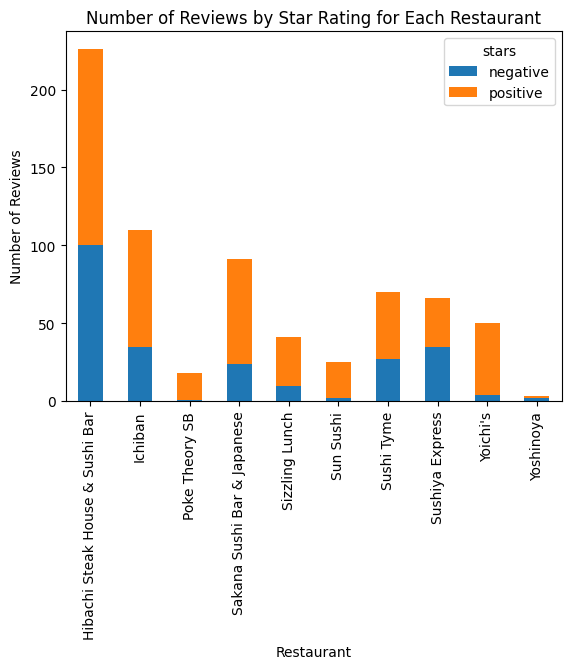

In [138]:
# Visualize the distribution of negative and positive reviews of each restaurant
import matplotlib.pyplot as plt

unique_stars_count = filtered_df.groupby('name')['stars'].value_counts().unstack()

unique_stars_count.plot(kind='bar', stacked=True)
plt.title('Number of Reviews by Star Rating for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')
plt.show()


In [130]:
# Distribution of the negative and positive review in each four topics

topic_counts = filtered_df.groupby('Name')['stars'].value_counts().unstack()
topic_counts

stars,negative,positive
Name,,
price,76,77
quality,17,62
service,106,291
wait,41,30


In [205]:
# Distribution in Percentage format

topic_percentages = (100 * restaurant_counts.div(restaurant_counts.sum(axis=1), axis=0)).round(1).astype(str) + '%'
topic_percentages


stars,negative,positive
Name,,
price,49.7%,50.3%
quality,21.5%,78.5%
service,26.7%,73.3%
wait,57.7%,42.3%


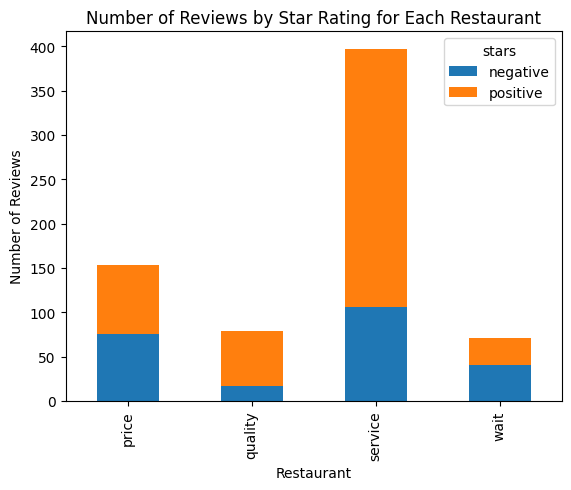

In [139]:
# Visualize the distribution
topic_stars_count = filtered_df.groupby('Name')['stars'].value_counts().unstack()

topic_stars_count.plot(kind='bar', stacked=True)
plt.title('Number of Reviews by Star Rating for Each Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Number of Reviews')
plt.show()

In [244]:
# Visualize the top 10 words in each four topics
topic_model.visualize_barchart(top_n_topics=4,n_words=20,height = 500)

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [245]:
freq = topic_model.get_topic_info()
print("Number of topics: {}".format(len(freq)))
freq.head(4)

Number of topics: 65


,Topic,Count,Name,Representation,Representative_Docs
0,0,397,service,"[restaurant, sushi, food, fish, service, chef,...",[Had dinner here with my daughters and friends...
1,1,153,price,"[sushi, prices, food, pricey, price, cheap, ex...","[When I have the $$ to spend, this is my favor..."
2,2,79,quality,"[sushi, food, fresh, fishy, tasty, fish, taste...",[I'm really happy a new poke place opened in I...
3,3,71,wait,"[sushi, restaurant, food, wait, waiting, waite...","[Not the best sushi, but when you're craving i..."


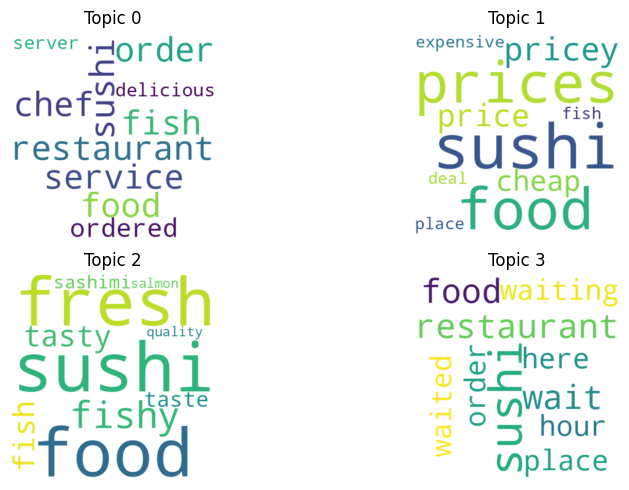

In [247]:
# Create word clouds for the first four topics
number_of_topics = 4
topics_to_visualize = freq.iloc[0:number_of_topics]["Topic"]

# Set up the figure size for four subplots
plt.figure(figsize=(10, 5))

# Loop through the topics and add a subplot for each word cloud
for i, topic_number in enumerate(topics_to_visualize, start=1):
    # Get the words and their frequencies for the current topic
    topic_words = dict(topic_model.get_topic(topic_number))

    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=400, background_color='white', min_font_size=10).generate_from_frequencies(topic_words)

    # Add a new subplot in a 2x2 grid
    ax = plt.subplot(2, 2, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_number}')
    plt.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
